# Modelo de Ising (el problema de Onsanger)

Aquino Chapa Martha Abril

In [100]:
using Plots

Iniciamos creando la red cuadrada de $N^2$ elementos, la cual en vez de presentarla como una matriz será un arreglo

$$RED = [1,2,3,...,N^2] $$

In [2]:
#función que genera una red considerando de manera aleatoria los elememtos de la red: -1 o 1
#El total de elementos en la red es N^2
function generador_de_red(N)
    return  [rand([-1,1]) for i in 1:N^2]
end

generador_de_red (generic function with 1 method)

In [115]:
#Probando la función:
N=10000
red_prueba = generador_de_red(N)

100000000-element Array{Int64,1}:
  1
  1
  1
 -1
 -1
 -1
  1
 -1
  1
  1
 -1
 -1
 -1
  ⋮
 -1
  1
  1
 -1
  1
 -1
  1
  1
 -1
 -1
  1
 -1

Ahora generamos un arreglo en el cual en cada fila se encuentren acomodados los vecinos del i-ésimo elemento. 
Estarán acomodados de la siguiente manera: [vecino de arriba, vecino de la derecha, vecino de abajo, vecino de la izquierda]

In [4]:
function generador_indice_vecinos(red)
    N² = length(red)
    N= Int((N²)^(1/2))
    v = zeros(N²,4)
    #v[i] = [arriba, derecha, abajo, izquierda]

    #Obtenemos el arreglado donde acomodamos los situos de los
    
    #Iniciamos a indexar los vecinos de arriba
    for j in 1:N²
        if j+N<= N²
            v[j,1] = j+N 

        elseif j+N>N²
            v[j,1] = j - N*(N-1)
        end

        #Para los vecinos de la derecha
        if j%N != 0 
            v[j,2] = j+1
        elseif j%N ==0
            v[j,2] = j-N+1 
        end


        #Para los vecinos de abajo

        if j-N>=1
            v[j,3] = j-N
        elseif j-N<1
            v[j,3] =j+N*(N-1)
        end

        #Para los vecinos izquierda

        if (j-1)%N != 0
            v[j,4] = j-1
        elseif (j-1)%N ==0
            v[j,4] = j+N-1
        end
    end
    #Regresamos el arreglo donde están los vecinos
    return v
end

generador_indice_vecinos (generic function with 1 method)

In [116]:
#Probando la función con la red de prueba
vecinos_prueba = generador_indice_vecinos(red_prueba)
#print(vecinos_prueba[1,3])

100000000×4 Array{Float64,2}:
 10001.0   2.0      9.999e7  10000.0
 10002.0   3.0      9.999e7      1.0
 10003.0   4.0      9.999e7      2.0
 10004.0   5.0      9.999e7      3.0
 10005.0   6.0      9.999e7      4.0
 10006.0   7.0      9.999e7      5.0
 10007.0   8.0      9.999e7      6.0
 10008.0   9.0      9.999e7      7.0
 10009.0  10.0      9.999e7      8.0
 10010.0  11.0      9.999e7      9.0
 10011.0  12.0      9.999e7     10.0
 10012.0  13.0      9.999e7     11.0
 10013.0  14.0      9.999e7     12.0
     ⋮                       
  9989.0   1.0e8    9.999e7      1.0e8
  9990.0   1.0e8    9.999e7      1.0e8
  9991.0   1.0e8    9.999e7      1.0e8
  9992.0   1.0e8    9.999e7      1.0e8
  9993.0   1.0e8    9.999e7      1.0e8
  9994.0   1.0e8    9.999e7      1.0e8
  9995.0   1.0e8    9.999e7      1.0e8
  9996.0   1.0e8    9.999e7      1.0e8
  9997.0   1.0e8    9.999e7      1.0e8
  9998.0   1.0e8    9.999e7      1.0e8
  9999.0   1.0e8    9.999e7      1.0e8
 10000.0   9.999e7  9.999e7   

En el modelo de Ising considerando geometría cuadrada se tiene que la energía de interacción de un elemento con sus vecinos está dada por
$$E= -J\sum_{<ij>}S_iS_j $$

Por lo que la energía de un elemento se calcula con la siguiente función

Creamos una función que nos devuelva la energía total del sistema 

In [10]:
function energia_total_del_sistema(red_lista,vecinos_lista,J)### Indice del elemento de 
    #Creamos un arreglo donde iremos sumando cada elemento de la suma de la energía total
    energia_total = 0
    #Creamos un arreglo que obtenga la energía de interacción de cada elemento de la red
    N² = length(red_lista)
    for i in 1:N²
       #variable donde se anexará el i-ésimo elemento de la suma
        energia = 0
        #creamos un ciclo que multiplique el spin del elemento de la red por el de sus vecinos
        for j in 1:4
            #Indice del vecino en la red
            k = Int(vecinos_lista[i,j])
            energia += red_lista[i]*red_lista[k]
        end
        energia_total += energia*(-J)
    end
    return energia_total/2
end

energia_total_del_sistema (generic function with 1 method)

In [112]:
energia_total_prueba = energia_total_del_sistema(red_prueba,vecinos_prueba,0.1)

-15.600000000000392

In [16]:
function magnetizacion(red_lista)
    return sum(red_lista)
end

magnetizacion (generic function with 1 method)

In [106]:
magnetizacion_prueba = magnetizacion(red_prueba)

380

### Implementando el algoritmo de Metropolis con Monte Carlo 

Generando el algoritmo de Metropolis
$$\frac{p_i}{p_j} = e^{(-\beta(E_i-E_j))} $$
y queremos encontrar el estado de equilibrio

In [84]:
function energia_por_elemento(elemento,elemento_indice,vecinos_indices,red_lista,J)### Indice del elemento de 
    #Variable donde se almacenará la suma de los elementos de la energía
    energia_suma = 0
    for i in 1:4
        indice_vecino = Int(vecinos_indices[elemento_indice,i])
        energia_suma += elemento*red_lista[indice_vecino]
    end
    return energia_suma*(-J)
    
end

energia_por_elemento (generic function with 2 methods)

In [98]:
function ising(red_inicial,energia_inicial,β,J)#Q son las iteraciones máximas
    N² = Int(length(red_inicial))
    Q=500
    red_inicial = copy(red_inicial)
    #contando el spin total y la energia total en cada iteracion, omitiendo los de la primera
    #iteracion
    energias = zeros(Q)
    spines = zeros(Q)
    vecinos = generador_indice_vecinos(red_inicial)
    for i in 1:Q
        #Definimos el elemento al que se le cambiará el spin aleatoriamente 
        x = Int(rand(1:length(red_inicial)))
        #sus vecinos 
        
        #cambiamos el spin en la copia de la red
        spin_inicial = red_inicial[x] 
        #La propuesta para cambiar el spin
        spin_final = spin_inicial*(-1)
        energia_inicial = energia_por_elemento(spin_inicial,Int(x),vecinos,red_inicial,J)
    
        energia_final = energia_inicial = energia_por_elemento(spin_final,x,vecinos,red_inicial,J)
        
        dE= energia_final-energia_inicial
        if dE<0*(rand()<exp(-β*J*dE))
            red_inicial[x] = spin_final
        elseif dE<=0
            red_inicial[x] = spin_final
        end
        spines[i] = sum(red_inicial)
        energias[i] = energia_total_del_sistema(red_inicial,vecinos,J)
    end
    return spines, energias
end

ising (generic function with 2 methods)

In [107]:
spines, energias = ising(red_prueba,energia_total_prueba,1,1)

([378.0, 380.0, 382.0, 384.0, 382.0, 384.0, 386.0, 384.0, 382.0, 384.0  …  402.0, 400.0, 398.0, 396.0, 398.0, 396.0, 398.0, 400.0, 402.0, 404.0], [-172.0, -172.0, -168.0, -164.0, -172.0, -172.0, -176.0, -172.0, -176.0, -180.0  …  -256.0, -252.0, -248.0, -252.0, -256.0, -260.0, -260.0, -264.0, -260.0, -264.0])

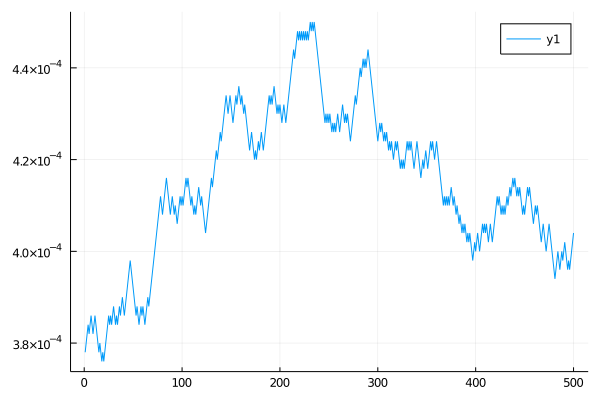

In [113]:
plot(spines./(N^2))
       

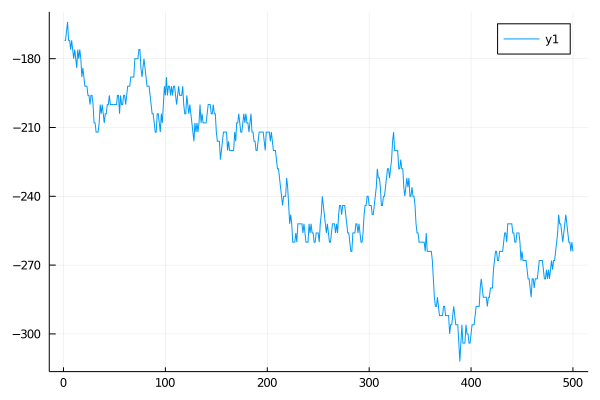

In [114]:
plot(energias)